In [1]:
import os
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
print(BASE_DIR)

import numpy as np
import pandas as pd

import bokeh.plotting as bp
from bokeh.models import tools as bmt, ColumnDataSource

from bokeh.io import output_notebook, export_png
output_notebook()

from IPython.display import Image

/Users/biplovbhandari/UAH/Fall_2021/ESS_690_Hydrology/ess-690-hydrology


Loading BokehJS ...

In [2]:
BASE_DIR = f'{BASE_DIR}/HW#2'
BASE_DIR

'/Users/biplovbhandari/UAH/Fall_2021/ESS_690_Hydrology/ess-690-hydrology/HW#2'

In [3]:
def initialize_fig(title: str = 'your_title',
                   x_axis_label: str = 'x_axis_label',
                   x_axis_type: str = 'auto',
                   y_axis_label: str = 'y_axis_label',
                   y_axis_type: str = 'auto',
                   tools: str = 'pan,wheel_zoom,box_zoom,reset',
                   tooltips: list = [],
                   formatters: dict = {},
                   plot_height: int = 300,
                   fig_sizing_mode: str = 'scale_width',
                   ) -> bp.figure:
    # bokeh style
    TOOLS = tools
    hover_tool = bmt.HoverTool(tooltips=tooltips, formatters=formatters)

    fig = bp.figure(title=title,
                    x_axis_label=x_axis_label,
                    x_axis_type=x_axis_type,
                    y_axis_label=y_axis_label,
                    y_axis_type=y_axis_type,
                    plot_height=plot_height,
                    tools=TOOLS,
                   )
    fig.add_tools(hover_tool)
    fig.sizing_mode = fig_sizing_mode

    return fig

### Question 1

#### Compare the Brooks and Corey, Campbell and van Genuchten k(θ) – θ analytic relationship (i.e. moisture conductivity) for a silty clay loam. Plot the data and briefly discuss the differences. Use θ_r = 0.057 . For the van Genuchten parameters:

Percent by Weight Finer Than Indicated Diameter (mm)

| Soil | 50  | 19  | 9.5 | 4.76 | 2.00 | 0.420 | 0.074 | 0.020 | 0.005 | 0.002 |
| ---  | --- | --- | --- | ---  | ---  | ---   | ---   | ---   | ---   | ---   |
| 1.1  | 100 | 100 | 100 | 100  | 100  | 100   |  97   |  79   |  45   |  16   |
| 1.2  | 100 | 100 |  98 |  94  |  70  |  19   |  15   |   8   |   3   |   2   |
| 1.3  |  93 |  91 |  88 |  85  |  69  |  44   |  40   |  27   |  13   |   6   |
| 1.4  | 100 | 100 | 100 | 100  | 100  |  97   |  92   |  75   |  47   |  31   |

In [4]:
# soil df setup
soil_mm_int = [50., 19., 9.5, 4.76, 2., 0.420, 0.074, 0.020, 0.005, 0.002]
# soil_mm = ['50.', '19.', '9.5', '4.76', '2.', '0.420', '0.074', '0.020', '0.005', '0.002']
soil_1  = [ 100.,  100.,  100.,   100., 100.,    100.,     97.,     79.,     45.,     16.]
soil_2  = [ 100.,  100.,   98.,    94.,  70.,     19.,     15.,      8.,      3.,      2.]
soil_3  = [  93.,   91.,   88.,    85.,  69.,     44.,     40.,     27.,     13.,      6.]
soil_4  = [ 100.,  100.,  100.,   100., 100.,     97.,     92.,     75.,     47.,     31.]

df_1 = pd.DataFrame(data=soil_1, index=soil_mm_int, columns=['sample_percent'])
df_1.index.name = 'soil_mm'

df_2 = pd.DataFrame(data=soil_2, index=soil_mm_int, columns=['sample_percent'])
df_2.index.name = 'soil_mm'

df_3 = pd.DataFrame(data=soil_3, index=soil_mm_int, columns=['sample_percent'])
df_3.index.name = 'soil_mm'

df_4 = pd.DataFrame(data=soil_4, index=soil_mm_int, columns=['sample_percent'])
df_4.index.name = 'soil_mm'

# df4.index = df4.index.map(str)

In [5]:
# < 2mm calculation

# soil 1
soil_1_2mm = df_1[df_1.index == 2.].sample_percent.values[0]
df_1['lt_2mm_percent'] = df_1[df_1.index <= 2.].apply(lambda x: round(x / soil_1_2mm * 100, 2))

# soil 2
soil_2_2mm = df_2[df_2.index == 2.].sample_percent.values[0]
df_2['lt_2mm_percent'] = df_2[df_2.index <= 2.].apply(lambda x: round(x / soil_2_2mm * 100, 2))

# soil 3
soil_3_2mm = df_3[df_3.index == 2.].sample_percent.values[0]
df_3['lt_2mm_percent'] = df_3[df_3.index <= 2.].apply(lambda x: round(x / soil_3_2mm * 100, 2))

# soil 4
soil_4_2mm = df_4[df_4.index == 2.].sample_percent.values[0]
df_4['lt_2mm_percent'] = df_4[df_4.index <= 2.].apply(lambda x: round(x / soil_4_2mm * 100, 2))

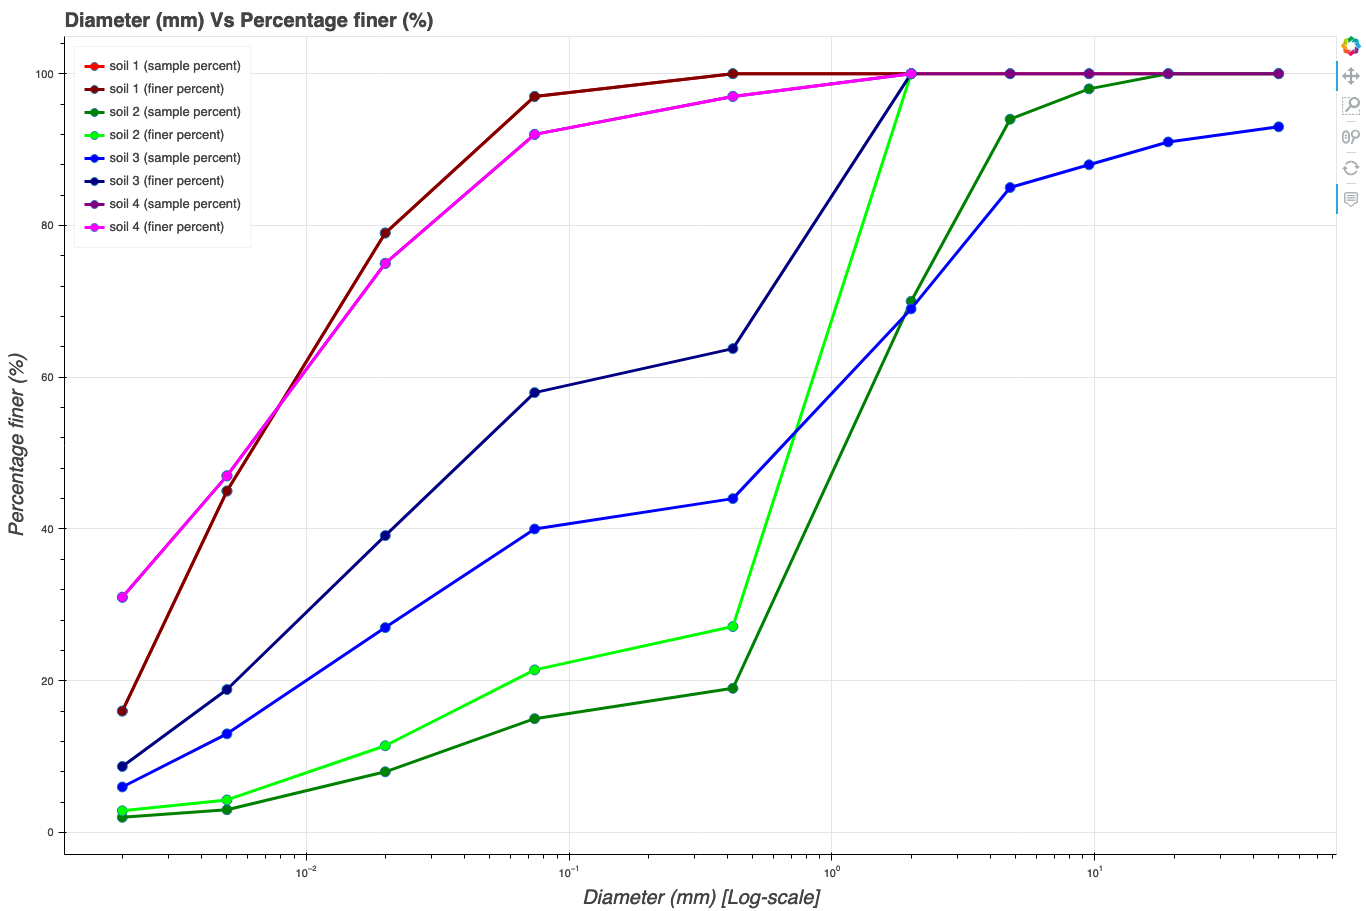

In [6]:
fig = initialize_fig(title = 'Diameter (mm) Vs Percentage finer (%)',
                     x_axis_label = 'Diameter (mm) [Log-scale]',
                     y_axis_label = 'Percentage finer (%)',
                     x_axis_type = 'log',
                     tooltips = [
                         ('dimeter(mm)', '$x'),
                         ('% finer'    , '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df_1.index, df_1.sample_percent, fill_color='red', size=10, legend_label='soil 1 (sample percent)')
fig.line(df_1.index, df_1.sample_percent, line_width=3, line_color='red', legend_label=f'soil 1 (sample percent)')
fig.circle(df_1.index, df_1.lt_2mm_percent, fill_color='maroon', size=10, legend_label='soil 1 (finer percent)')
fig.line(df_1.index, df_1.lt_2mm_percent, line_width=3, line_color='maroon', legend_label=f'soil 1 (finer percent)')

fig.circle(df_2.index, df_2.sample_percent, fill_color='green', size=10, legend_label='soil 2 (sample percent)')
fig.line(df_2.index, df_2.sample_percent, line_width=3, line_color='green', legend_label=f'soil 2 (sample percent)')
fig.circle(df_2.index, df_2.lt_2mm_percent, fill_color='lime', size=10, legend_label='soil 2 (finer percent)')
fig.line(df_2.index, df_2.lt_2mm_percent, line_width=3, line_color='lime', legend_label=f'soil 2 (finer percent)')

fig.circle(df_3.index, df_3.sample_percent, fill_color='blue', size=10, legend_label='soil 3 (sample percent)')
fig.line(df_3.index, df_3.sample_percent, line_width=3, line_color='blue', legend_label=f'soil 3 (sample percent)')
fig.circle(df_3.index, df_3.lt_2mm_percent, fill_color='navy', size=10, legend_label='soil 3 (finer percent)')
fig.line(df_3.index, df_3.lt_2mm_percent, line_width=3, line_color='navy', legend_label=f'soil 3 (finer percent)')

fig.circle(df_4.index, df_4.sample_percent, fill_color='purple', size=10, legend_label='soil 4 (sample percent)')
fig.line(df_4.index, df_4.sample_percent, line_width=3, line_color='purple', legend_label=f'soil 4 (sample percent)')
fig.circle(df_4.index, df_4.lt_2mm_percent, fill_color='fuchsia', size=10, legend_label='soil 4 (finer percent)')
fig.line(df_4.index, df_4.lt_2mm_percent, line_width=3, line_color='fuchsia', legend_label=f'soil 4 (finer percent)')


fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_1.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_1.png')

In [7]:
# Texture calculation

# soil 1
x1 = df_1.iloc[5:].index.values.tolist()
y1 = df_1.iloc[5:].sample_percent.values.tolist()
coefficients1, _ = np.polynomial.polynomial.polyfit(x1, y1, 1, full=True)
coefficients1 = coefficients1[::-1]
m1, c1 = coefficients1[0], coefficients1[1]
p1_05 = m1 * 0.05 + c1

# soil 2
x2 = df_2.iloc[1:].index.values.tolist()
y2 = df_2.iloc[1:].sample_percent.values.tolist()
coefficients2, _ = np.polynomial.polynomial.polyfit(x2, y2, 1, full=True)
coefficients2 = coefficients2[::-1]
m2, c2 = coefficients2[0], coefficients2[1]
p2_05 = m2 * 0.05 + c2

# soil 3
x3 = df_3.index.values.tolist()
y3 = df_3.sample_percent.values.tolist()
coefficients3, _ = np.polynomial.polynomial.polyfit(x3, y3, 1, full=True)
coefficients3 = coefficients3[::-1]
m3, c3 = coefficients3[0], coefficients3[1]
p3_05 = m3 * 0.05 + c3

# soil 3
x4 = df_4.iloc[4:].index.values.tolist()
y4 = df_4.iloc[4:].sample_percent.values.tolist()
coefficients4, _ = np.polynomial.polynomial.polyfit(x4, y4, 1, full=True)
coefficients4 = coefficients4[::-1]
m4, c4 = coefficients4[0], coefficients4[1]
p4_05 = m4 * 0.05 + c4

print(f'p1_05: {p1_05}')
print(f'p2_05: {p2_05}')
print(f'p3_05: {p3_05}')
print(f'p4_05: {p4_05}')

# since these values are significantly off just by looking at the table.
# Thus to avoid significant difference, we will just guess the value
s1_sample_05 = 89.
s2_sample_05 = 12.
s3_sample_05 = 34.
s4_sample_05 = 85.

s1_lt_05     = 89.
s2_lt_05     = 16.43
s3_lt_05     = 49.85
s4_lt_05     = 85.

df_1.loc[0.05] = [s1_sample_05, s1_lt_05]
df_2.loc[0.05] = [s2_sample_05, s2_lt_05]
df_3.loc[0.05] = [s3_sample_05, s3_lt_05]
df_4.loc[0.05] = [s4_sample_05, s4_lt_05]

p1_05: 60.66839664793997
p2_05: 24.384433872847595
p3_05: 44.15098690890004
p4_05: 66.12465271160718


In [8]:
df_1 = df_1.sort_index(ascending=False)
df_2 = df_2.sort_index(ascending=False)
df_3 = df_3.sort_index(ascending=False)
df_4 = df_4.sort_index(ascending=False)

In [9]:
df_2

,sample_percent,lt_2mm_percent
soil_mm,,
50.000,100.0,NaN
19.000,100.0,NaN
9.500,98.0,NaN
4.760,94.0,NaN
2.000,70.0,100.00
0.420,19.0,27.14
0.074,15.0,21.43
0.050,12.0,16.43
0.020,8.0,11.43


In [10]:
soil_texture   =      ['gravel(d>2mm)', 'sand(0.05<=d<2mm)', 'silt(0.002<=d<0.05mm)', 'clay(d<0.002mm)']
# total sample
soil_1_sample  =      [      0.,             11.,                  73.,                    16. ]
soil_2_sample  =      [     30.,             58.,                  10.,                     2. ]
soil_3_sample  =      [     31.,             35.,                  28.,                     6. ]
soil_4_sample  =      [      0.,             15.,                  54.,                    31. ]

# lt 2 mm sample
soil_1_lt_2    =      [  np.nan,             11.,                  73.,                    16. ]
soil_2_lt_2    =      [  np.nan,           83.56,                13.58,                   2.86 ]
soil_3_lt_2    =      [  np.nan,           50.15,                41.15,                   8.70 ]
soil_4_lt_2    =      [  np.nan,             15.,                  54.,                    31. ]

In [11]:
# Looking at the figure 7.5 to classify the sand
print(f'The soil 1.1 is silt Loam.')
print(f'The soil 1.2 is Loamy Sand. Since the percentage of gravel is greater than 15%, so it is a gravelly loamy sand.')
print(f'The soil 1.3 is sandy Loam. Since the percentage of gravel is greater than 15%, so it is a gravelly sandy loam.')
print(f'The soil 1.4 is Silty Clay Loam.')


The soil 1.1 is silt Loam.
The soil 1.2 is Loamy Sand. Since the percentage of gravel is greater than 15%, so it is a gravelly loamy sand.
The soil 1.3 is sandy Loam. Since the percentage of gravel is greater than 15%, so it is a gravelly sandy loam.
The soil 1.4 is Silty Clay Loam.


### Question 2

#### Compare the Brooks and Corey, Campbell and van Genuchten k(θ) – θ analytic relationship (i.e. moisture conductivity) for a silty clay loam. Plot the data and briefly discuss the differences. Use θ_r = 0.057 . For the van Genuchten parameters:
n = 1.24
<br>
θ(vg)* = θ*

In [12]:
n = 1.24 # parameter that depends on pore-size distribution
porosity = 0.477 # porosity
θr = 0.057 # residual water content
Kh = 1.7e-4 # cm/s saturated hydraulic conductivity
b = 7.75 # parameter that depends upon pore size distribution



In [13]:
# index is the θ
df = pd.DataFrame(index = np.arange(0., 1.05, .025), columns = ['BC', 'C', 'VG'])


In [14]:
df['θ*'] = (df.index - θr) / (porosity - θr)


In [15]:
df


,BC,C,VG,θ*
0.000,NaN,NaN,NaN,-0.135714
0.025,NaN,NaN,NaN,-0.076190
0.050,NaN,NaN,NaN,-0.016667
0.075,NaN,NaN,NaN,0.042857
0.100,NaN,NaN,NaN,0.102381
0.125,NaN,NaN,NaN,0.161905
0.150,NaN,NaN,NaN,0.221429
0.175,NaN,NaN,NaN,0.280952
0.200,NaN,NaN,NaN,0.340476
0.225,NaN,NaN,NaN,0.400000


In [16]:
df['BC'] = (df['θ*']**(2. * b + 3)) * Kh


In [17]:
df

,BC,C,VG,θ*
0.000,NaN,NaN,NaN,-0.135714
0.025,NaN,NaN,NaN,-0.076190
0.050,NaN,NaN,NaN,-0.016667
0.075,8.372948e-30,NaN,NaN,0.042857
0.100,8.308134e-23,NaN,NaN,0.102381
0.125,3.997164e-19,NaN,NaN,0.161905
0.150,1.310001e-16,NaN,NaN,0.221429
0.175,1.071900e-14,NaN,NaN,0.280952
0.200,3.750194e-13,NaN,NaN,0.340476
0.225,7.388542e-12,NaN,NaN,0.400000


In [18]:
df['C'] = (df.index / porosity)**(2. * b + 3) * Kh


In [19]:
df

,BC,C,VG,θ*
0.000,NaN,0.000000e+00,NaN,-0.135714
0.025,NaN,3.465366e-28,NaN,-0.076190
0.050,NaN,1.284707e-22,NaN,-0.016667
0.075,8.372948e-30,2.325371e-19,NaN,0.042857
0.100,8.308134e-23,4.762762e-17,NaN,0.102381
0.125,3.997164e-19,2.955930e-15,NaN,0.161905
0.150,1.310001e-16,8.620793e-14,NaN,0.221429
0.175,1.071900e-14,1.493010e-12,NaN,0.280952
0.200,3.750194e-13,1.765687e-11,NaN,0.340476
0.225,7.388542e-12,1.560398e-10,NaN,0.400000


In [20]:
# Since θvg* = θ*
df['θvg*'] = df['θ*']


In [21]:
df['VG_1'] = df['θvg*']**(1/2)
df['VG_2'] = 1 - (df['θvg*'])**(n/(n-1))
df['VG_3'] = (df['VG_2'])**((n - 1)/n)
df['VG_4'] = (1 - df['VG_3'])**2

# df['VG'] = df['θvg*']**0.5 * (1 - (1 - df['θvg*']**(n/(n-1)))**((n - 1)/n))**2 * Kh
df['VG'] = df['VG_1'] * df['VG_4'] * Kh
df = df.drop(columns=['VG_1', 'VG_2', 'VG_3', 'VG_4'], axis=1)
# df = df.dropna()


In [22]:
df


,BC,C,VG,θ*,θvg*
0.000,NaN,0.000000e+00,NaN,-0.135714,-0.135714
0.025,NaN,3.465366e-28,NaN,-0.076190,-0.076190
0.050,NaN,1.284707e-22,NaN,-0.016667,-0.016667
0.075,8.372948e-30,2.325371e-19,9.644496e-21,0.042857,0.042857
0.100,8.308134e-23,4.762762e-17,1.206160e-16,0.102381,0.102381
0.125,3.997164e-19,2.955930e-15,1.728633e-14,0.161905,0.161905
0.150,1.310001e-16,8.620793e-14,5.138910e-13,0.221429,0.221429
0.175,1.071900e-14,1.493010e-12,6.782330e-12,0.280952,0.280952
0.200,3.750194e-13,1.765687e-11,5.448901e-11,0.340476,0.340476
0.225,7.388542e-12,1.560398e-10,3.134012e-10,0.400000,0.400000


In [23]:
df = df.dropna()

In [24]:
df

,BC,C,VG,θ*,θvg*
0.075,8.372948e-30,2.325371e-19,9.644496e-21,0.042857,0.042857
0.100,8.308134e-23,4.762762e-17,1.206160e-16,0.102381,0.102381
0.125,3.997164e-19,2.955930e-15,1.728633e-14,0.161905,0.161905
0.150,1.310001e-16,8.620793e-14,5.138910e-13,0.221429,0.221429
0.175,1.071900e-14,1.493010e-12,6.782330e-12,0.280952,0.280952
0.200,3.750194e-13,1.765687e-11,5.448901e-11,0.340476,0.340476
0.225,7.388542e-12,1.560398e-10,3.134012e-10,0.400000,0.400000
0.250,9.619384e-11,1.095845e-09,1.419215e-09,0.459524,0.459524
0.275,9.157611e-10,6.390190e-09,5.379781e-09,0.519048,0.519048
0.300,6.824221e-09,3.195966e-08,1.781551e-08,0.578571,0.578571


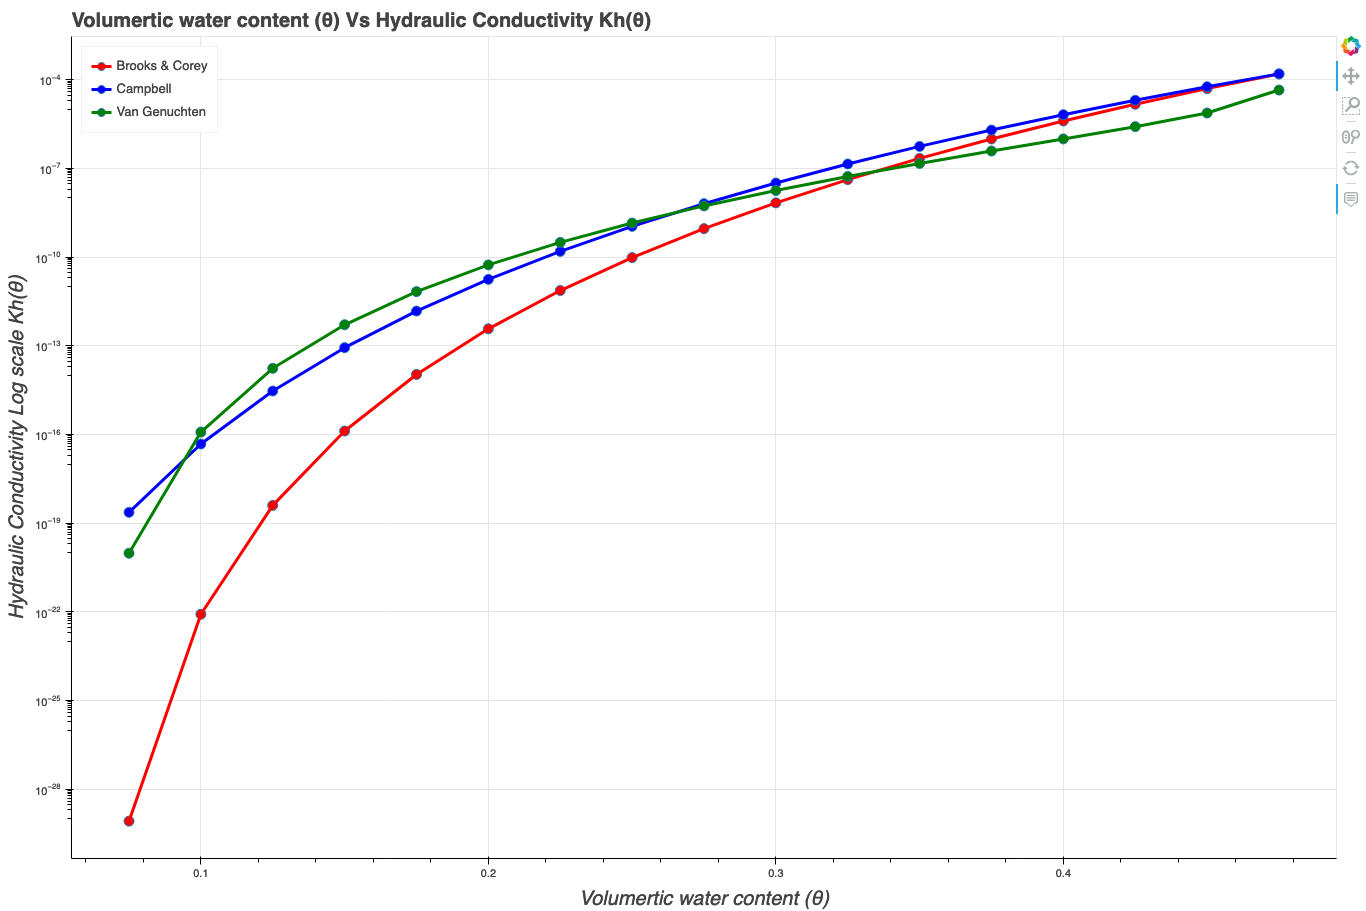

In [25]:
fig = initialize_fig(title = 'Volumertic water content (θ) Vs Hydraulic Conductivity Kh(θ)',
                     x_axis_label = 'Volumertic water content (θ)',
                     y_axis_label = 'Hydraulic Conductivity Log scale Kh(θ)',
                     y_axis_type = 'log',
                     tooltips = [
                         ('θ', '$x'),
                         ('Kh(θ)',     '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df.index, df.BC, fill_color='red', size=10, legend_label=f'Brooks & Corey')
fig.line(df.index, df.BC, line_width=3, line_color='red', legend_label=f'Brooks & Corey')

fig.circle(df.index, df.C,  fill_color='blue', size=10, legend_label=f'Campbell')
fig.line(df.index, df.C, line_width=3, line_color='blue', legend_label=f'Campbell')

fig.circle(df.index, df.VG, fill_color='green', size=10, legend_label=f'Van Genuchten')
fig.line(df.index, df.VG, line_width=3, line_color='green', legend_label=f'Van Genuchten')

fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_2.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_2.png')

The graph above shows the relation between the Volumetric Water Content (θ) plotted in the X-axis and the Hydraulic Conductivity Kh(θ) plotted in the Y-axis. The Kh(θ) is plotted in log scale. This shows the general relationship where for a soil, the unsaturated hydraulic conductivity  is low, and it increases nonlinearly to its saturated value as water content increases to saturation. The Kh(θ) is calcualted from 3 methods. Brooks and Corey shows significant difference (several orders of magnitude) with the other two at the lower volumetric water content, but the Kh(θ) gets closer as we move towards the higher saturation.

### Question 3

In [26]:
# For various soils

ϕ_sand = 0.395 # porosity
ϕ_silt_loam = 0.485
ϕ_loam = 0.451
ϕ_clay = 0.482

ψ_abs_sand = 12.1 # absolute pressure head
ψ_abs_silt_loam = 78.6
ψ_abs_loam = 47.8
ψ_abs_clay = 40.5

Kh_sand = 1.76e-2 # saturated hydraulic conductivity
Kh_silt_loam = 7.20e-4
Kh_loam = 6.95e-4
Kh_clay = 1.28e-4

b_sand = 4.05 # parameter that depends upon pore size distribution
b_silt_loam = 5.30
b_loam = 5.39
b_clay = 11.40

# assume
θr = 0.05 # residual water content

# HC: Hydraulic conductivity
# PH: Pressure head
# index is the θ
df = pd.DataFrame(index = np.arange(0.01, 0.5, .01), columns=[
    'θ*_Sand', 'θ*_Silt_Loam', 'θ*_Loam', 'θ*_Clay',
    'HC_Sand', 'HC_Silt_Loam', 'HC_Loam', 'HC_Clay',
    'PH_Sand', 'PH_Silt_Loam', 'PH_Loam', 'PH_Clay',
])

df['θ*_Sand'] = (df.index - θr) / (ϕ_sand - θr)
df['θ*_Silt_Loam'] = (df.index - θr) / (ϕ_silt_loam - θr)
df['θ*_Loam'] = (df.index - θr) / (ϕ_loam - θr)
df['θ*_Clay'] = (df.index - θr) / (ϕ_clay - θr)

df['HC_Sand'] = (df['θ*_Sand']**(2. * b_sand + 3.)) * Kh_sand
df['HC_Silt_Loam'] = (df['θ*_Silt_Loam']**(2. * b_silt_loam + 3.)) * Kh_silt_loam
df['HC_Loam'] = (df['θ*_Loam']**(2. * b_loam + 3.)) * Kh_loam
df['HC_Clay'] = (df['θ*_Clay']**(2. * b_clay + 3.)) * Kh_clay

df['PH_Sand'] = np.where(df['θ*_Sand'] < 1, ψ_abs_sand * (1 / df['θ*_Sand'])**b_sand, ψ_abs_sand)
df['PH_Silt_Loam'] = np.where(df['θ*_Silt_Loam'] < 1, ψ_abs_silt_loam * (1 / df['θ*_Silt_Loam'])**b_silt_loam, ψ_abs_silt_loam)
df['PH_Loam'] = np.where(df['θ*_Loam'] < 1, ψ_abs_loam * (1 / df['θ*_Loam'])**b_loam, ψ_abs_loam)
df['PH_Clay'] = np.where(df['θ*_Clay'] < 1, ψ_abs_clay * (1 / df['θ*_Clay'])**b_clay, ψ_abs_clay)

In [27]:
df


,θ*_Sand,θ*_Silt_Loam,θ*_Loam,θ*_Clay,HC_Sand,HC_Silt_Loam,HC_Loam,HC_Clay,PH_Sand,PH_Silt_Loam,PH_Loam,PH_Clay
0.01,-0.115942,-0.091954,-0.099751,-0.092593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,-0.086957,-0.068966,-0.074813,-0.069444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,-0.057971,-0.045977,-0.049875,-0.046296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,-0.028986,-0.022989,-0.024938,-0.023148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,inf,inf,inf,inf
0.06,0.028986,0.022989,0.024938,0.023148,1.498721e-19,3.748682e-26,5.631905e-26,8.160735e-47,2.046222e+07,3.796782e+10,2.091106e+10,1.786363e+20
0.07,0.057971,0.045977,0.049875,0.046296,3.289680e-16,4.654645e-22,7.922253e-22,4.767637e-39,1.235325e+06,9.637328e+08,4.986828e+08,6.610401e+16
0.08,0.086957,0.068966,0.074813,0.069444,2.963239e-14,1.155388e-19,2.115370e-19,1.665167e-34,2.391176e+05,1.123758e+08,5.606509e+07,6.498116e+14
0.09,0.115942,0.091954,0.099751,0.092593,7.220822e-13,5.779556e-18,1.114402e-17,2.785333e-31,7.457783e+04,2.446232e+07,1.189249e+07,2.446165e+13
0.10,0.144928,0.114943,0.124688,0.115741,8.595829e-12,1.201906e-16,2.412470e-16,8.813642e-29,3.020815e+04,7.496777e+06,3.572134e+06,1.921815e+12


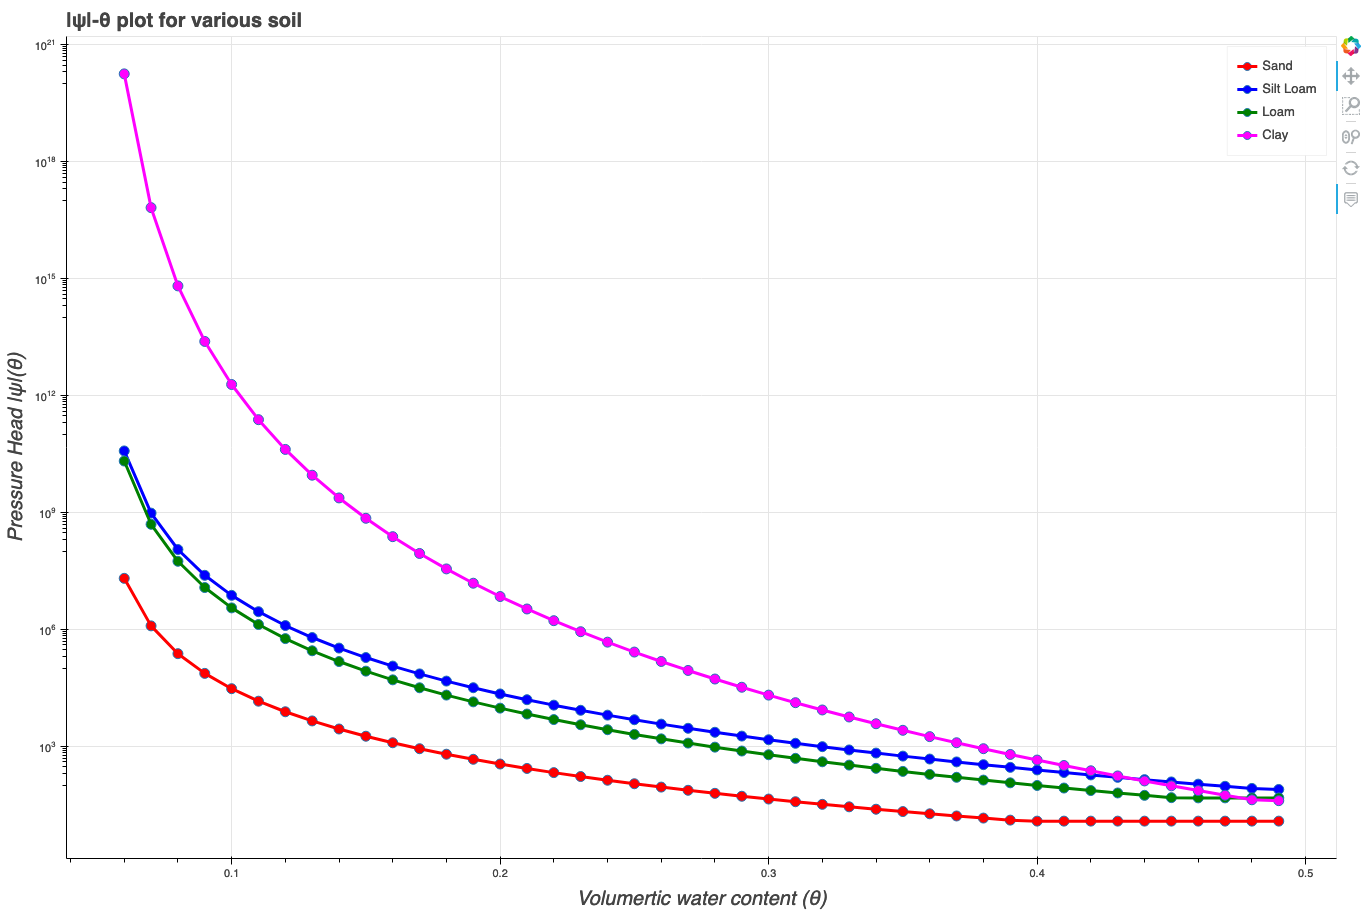

In [28]:
# |ψ| vs θ
fig = initialize_fig(title = '|ψ|-θ plot for various soil',
                     x_axis_label = 'Volumertic water content (θ)',
                     y_axis_label = 'Pressure Head |ψ|(θ)',
                     y_axis_type = 'log',
                     tooltips = [
                         ('θ',      '$x'),
                         ('|ψ|(θ)', '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'
fig.circle(df.index, df.PH_Sand, fill_color='red', size=10, legend_label=f'Sand')
fig.line(df.index, df.PH_Sand, line_width=3, line_color='red', legend_label=f'Sand')

fig.circle(df.index, df.PH_Silt_Loam, fill_color='blue', size=10, legend_label=f'Silt Loam')
fig.line(df.index, df.PH_Silt_Loam, line_width=3, line_color='blue', legend_label=f'Silt Loam')

fig.circle(df.index, df.PH_Loam,  fill_color='green', size=10, legend_label=f'Loam')
fig.line(df.index, df.PH_Loam, line_width=3, line_color='green', legend_label=f'Loam')

fig.circle(df.index, df.PH_Clay, fill_color='fuchsia', size=10, legend_label=f'Clay')
fig.line(df.index, df.PH_Clay, line_width=3, line_color='fuchsia', legend_label=f'Clay')

fig.legend.location = 'top_right'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_3_1.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_3_1.png')


The Pressure Head |ψ|(θ) and Volumertic water content (θ) relation is highly non-linear as can be seen from above graph. Note that the Y-axis plots the absolute value. So a high absolute pressure head means more tension in the soil.
For soils, as the porosity increases, the pressure head also increases. For example, the clay has very high pressure head compared to the sand. At very high tension, the curve is nearly vertical and reflects the residual water content held in the soil against all forces. As the water content in the soil increases, the tension also decreases and becomes zero (0) when the water content equals the porosity (saturation). Also can be noticed that as the water content increases the difference in the tension for various soil also decreases.

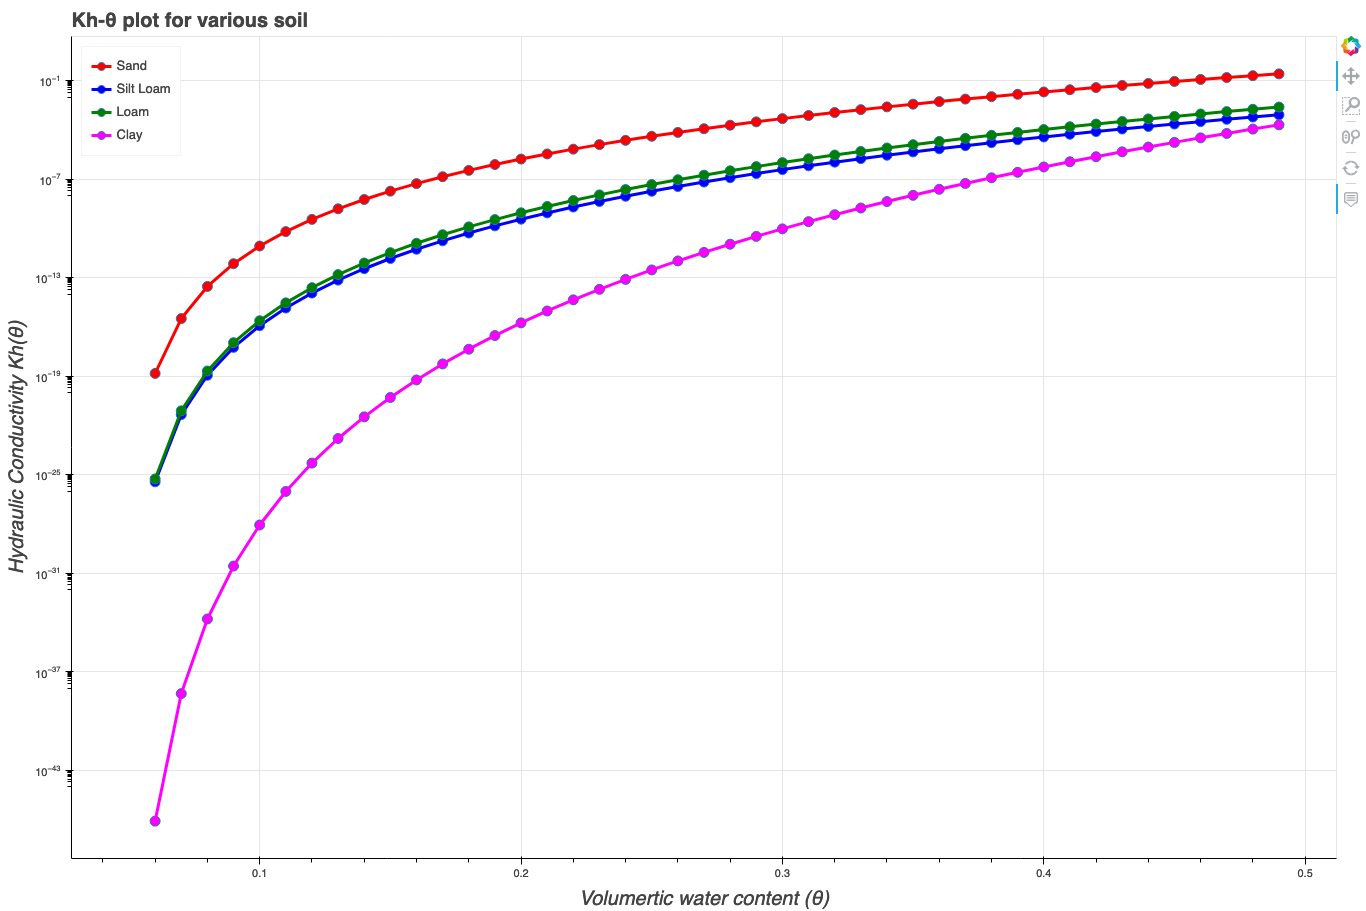

In [29]:
# Kh vs θ
fig = initialize_fig(title = 'Kh-θ plot for various soil',
                     x_axis_label = 'Volumertic water content (θ)',
                     y_axis_label = 'Hydraulic Conductivity Kh(θ)',
                     y_axis_type = 'log',
                     tooltips = [
                         ('θ',     '$x'),
                         ('Kh(θ)', '$y'),
                     ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'
fig.circle(df.index, df.HC_Sand, fill_color='red', size=10, legend_label=f'Sand')
fig.line(df.index, df.HC_Sand, line_width=3, line_color='red', legend_label=f'Sand')

fig.circle(df.index, df.HC_Silt_Loam, fill_color='blue', size=10, legend_label=f'Silt Loam')
fig.line(df.index, df.HC_Silt_Loam, line_width=3, line_color='blue', legend_label=f'Silt Loam')

fig.circle(df.index, df.HC_Loam,  fill_color='green', size=10, legend_label=f'Loam')
fig.line(df.index, df.HC_Loam, line_width=3, line_color='green', legend_label=f'Loam')

fig.circle(df.index, df.HC_Clay, fill_color='fuchsia', size=10, legend_label=f'Clay')
fig.line(df.index, df.HC_Clay, line_width=3, line_color='fuchsia', legend_label=f'Clay')

fig.legend.location = 'top_left'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_3_2.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_3_2.png')


The graph above shows the relation between the Volumetric Water Content (θ) plotted in the X-axis and the Hydraulic Conductivity Kh(θ) plotted in the Y-axis. The Kh(θ) is plotted in log scale. This shows the general relationship where for a soil, the unsaturated hydraulic conductivity is low, and it increases nonlinearly to its saturated value as water content increases to saturation.
For soil, as the porosity increases the hydraulic conductivity decreases as it becomes increasingly difficult for water to flow through highly porous soil. Thus the clay which is highly porous soil has much less conductivity than sand, and they differ by several orders of magnitude, but the Kh(θ) gets closer as we move towards the higher saturation.

#### Question 4

The 50-year return period, one-hour design storm for a location in Alabama is, is 4.9 inches. For a clay-loam soil, apply the Green and Ampt model to estimate the infiltration and runoff resulting from this storm. Assume that the soil has a moisture content of 0.2 at the beginning of the storm. Compare your results with an initial moisture content of θ_i=0.10. Compare your results with an intensity of 2 in/hr. How would your results look if the soil was a sandy loam instead? Plot F(t) vs t and f(t) vs t for each scenario. Discuss your results in a paragraph.
<br>
Ks = 0.1 cm/hr
<br>
θ_s=0.44
<br>
ψ=-28.4cm

In [30]:
i = 4.9 * 2.54 # cm
θa = 0.20
θns = 0.44
delta_θ = θns - θa

# for clay-loam soil
ϕ_clay_loam = 0.44
ψ_clay_loam = 28.4 # cm # absolute pressure head
Ks_clay_loam = 0.1 # cm/h # saturated hydraulic conductivity
b_clay_loam = 8.52 # parameter that depends upon pore size distribution

F_tp = (delta_θ * ψ_clay_loam) / (1. + (i / Ks_clay_loam)) # cm total mass at ponding
tp = F_tp / i # hour
dt = 1. - tp # 1-hour design storm
print(f'time of ponding: {tp} hr')
print(f'Mass at ponding: {F_tp} cm')

# rewriting green and ampt model eqn in simpler form
# 𝐹_𝑡𝑝+𝐾∆𝑡+∆𝜃𝜓 ∗ ln⁡((𝐹_(𝑡𝑝+∆𝑡)+∆𝜃𝜓)/(𝐹_𝑡𝑝+∆𝜃𝜓 ))
# m + ∆𝜃𝜓 * ln(c)
df_ga_clay_loam = pd.DataFrame(index = np.arange(0, 1.5, .01), columns = ['m', 'c', 'GA', 'delta', 'f_t', 't'])
df_ga_clay_loam.index.name = 'F_tp_dt'

df_ga_clay_loam['m'] = F_tp + (Ks_clay_loam * dt)
df_ga_clay_loam['c'] = (df_ga_clay_loam.index + (delta_θ * ψ_clay_loam)) / (F_tp + (delta_θ * ψ_clay_loam))

df_ga_clay_loam['GA'] = df_ga_clay_loam.m + delta_θ * ψ_clay_loam * np.log(df_ga_clay_loam.c)
df_ga_clay_loam['delta'] = df_ga_clay_loam.GA - df_ga_clay_loam.index

df_ga_clay_loam['f_t'] = Ks_clay_loam * (1. + ( (delta_θ * ψ_clay_loam) / df_ga_clay_loam.index ))
df_ga_clay_loam['f_t'] = np.where(df_ga_clay_loam.index <= F_tp, i, df_ga_clay_loam['f_t'])
# cannot apply this as the infiltration rate is changing over time after time of ponding
# df_ga_clay_loam['t'] = df_ga_clay_loam.index / df_ga_clay_loam.f_t

# instead use the formula in slide 16
df_ga_clay_loam['t1'] = (df_ga_clay_loam.index - F_tp) / Ks_clay_loam
df_ga_clay_loam['t2'] = ψ_clay_loam * delta_θ / Ks_clay_loam
df_ga_clay_loam['t3'] = (df_ga_clay_loam.index + (ψ_clay_loam * delta_θ)) / (F_tp + (ψ_clay_loam * delta_θ))
df_ga_clay_loam['t'] = df_ga_clay_loam['t1'] - df_ga_clay_loam['t2'] * np.log(df_ga_clay_loam['t3']) + tp
df_ga_clay_loam = df_ga_clay_loam.drop(columns=['t1', 't2', 't3'], axis=1)


time of ponding: 0.004365103060621213 hr
Mass at ponding: 0.054328072692491625 cm


In [31]:
df_ga_clay_loam


,m,c,GA,delta,f_t,t
F_tp_dt,,,,,,
0.00,0.153892,0.992092,0.099779,0.099779,12.446000,0.002211
0.01,0.153892,0.993548,0.109772,0.099772,12.446000,0.002285
0.02,0.153892,0.995003,0.119750,0.099750,12.446000,0.002504
0.03,0.153892,0.996459,0.129713,0.099713,12.446000,0.002870
0.04,0.153892,0.997914,0.139662,0.099662,12.446000,0.003381
...,...,...,...,...,...,...
1.45,0.153892,1.203145,1.414435,-0.035565,0.570069,1.355652
1.46,0.153892,1.204600,1.422676,-0.037324,0.566849,1.373243
1.47,0.153892,1.206056,1.430907,-0.039093,0.563673,1.390935


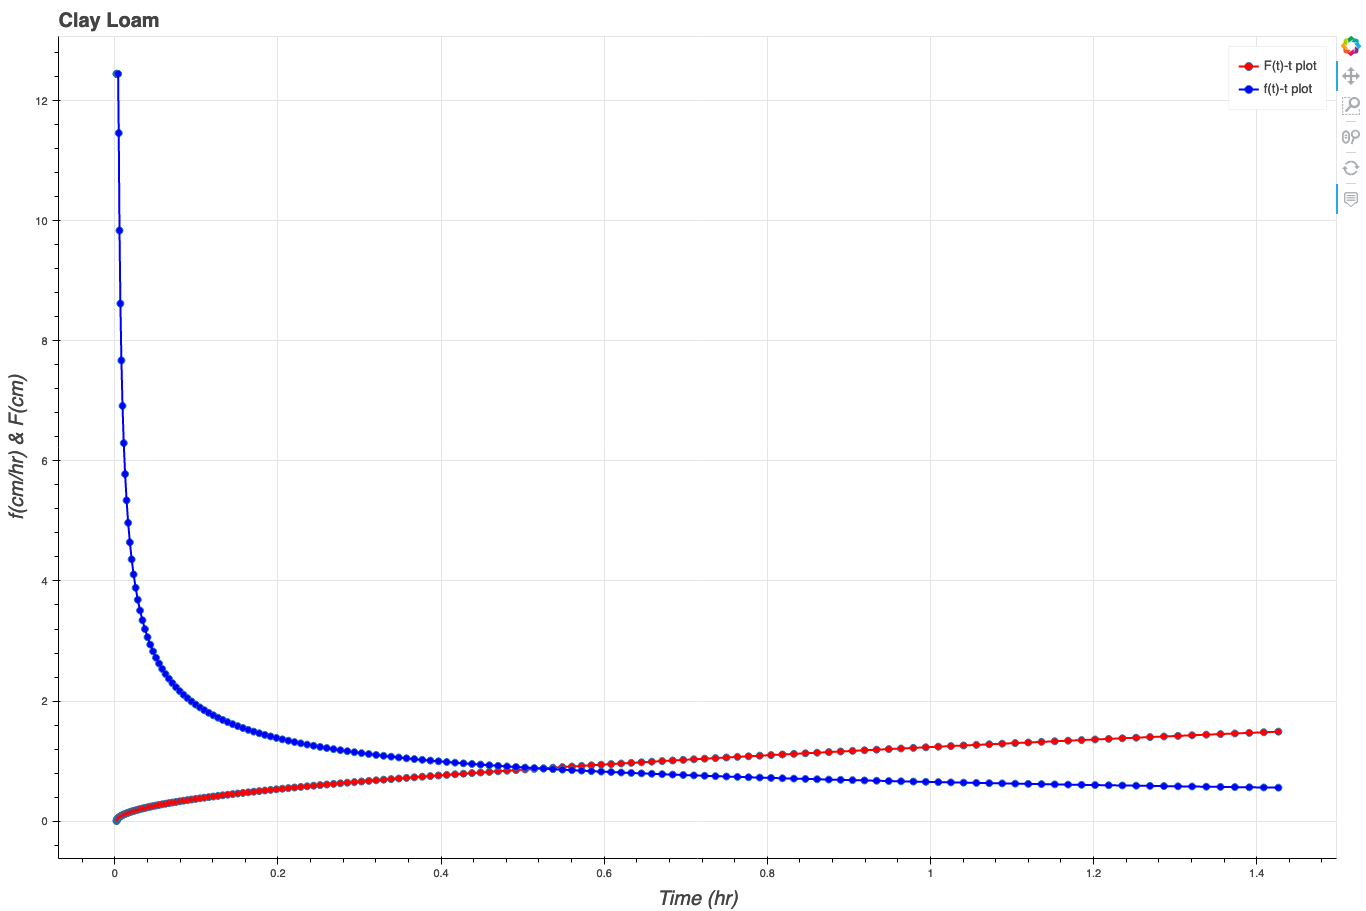

In [32]:
# f(t) vs t
fig = initialize_fig(title = 'Clay Loam',
                     x_axis_label = 'Time (hr)',
                     y_axis_label = 'f(cm/hr) & F(cm)',
#                      tooltips = [
#                          ('time (hr)', '$x'),
#                          ('f(cm/hr)',  '$y'),
#                      ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df_ga_clay_loam.t, df_ga_clay_loam.index, fill_color='red', size=7, legend_label='F(t)-t plot')
fig.line(df_ga_clay_loam.t, df_ga_clay_loam.index, line_width=2, line_color='red', legend_label='F(t)-t plot')

fig.circle(df_ga_clay_loam.t, df_ga_clay_loam.f_t, fill_color='blue', size=7, legend_label='f(t)-t plot')
fig.line(df_ga_clay_loam.t, df_ga_clay_loam.f_t, line_width=2, line_color='blue', legend_label='f(t)-t plot')

fig.legend.location = 'top_right'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_4_1.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_4_1.png')


In [33]:
# if intensity of 2 in/hr is considered

i = 2. * 2.54 # cm

F_tp = (delta_θ * ψ_clay_loam) / (1. + (i / Ks_clay_loam)) # total mass at ponding
tp = F_tp / i
dt = 1. - tp # 1-hour design storm
print(f'time of ponding: {tp} hr')
print(f'Mass at ponding: {F_tp} cm')

# rewriting green and ampt model eqn in simpler form
# 𝐹_𝑡𝑝+𝐾∆𝑡+∆𝜃𝜓 ∗ ln⁡((𝐹_(𝑡𝑝+∆𝑡)+∆𝜃𝜓)/(𝐹_𝑡𝑝+∆𝜃𝜓 ))
# m + ∆𝜃𝜓 * ln(c)
df_ga_clay_loam_2 = pd.DataFrame(index = np.arange(0., 1.5, .01), columns = ['m', 'c', 'GA', 'delta', 'f_t', 't'])
df_ga_clay_loam_2.index.name = 'F_tp_dt'

df_ga_clay_loam_2['m'] = F_tp + (Ks_clay_loam * dt)
df_ga_clay_loam_2['c'] = (df_ga_clay_loam_2.index + (delta_θ * ψ_clay_loam)) / (F_tp + (delta_θ * ψ_clay_loam))

df_ga_clay_loam_2['GA'] = df_ga_clay_loam_2.m + delta_θ * ψ_clay_loam * np.log(df_ga_clay_loam_2.c)
df_ga_clay_loam_2['delta'] = df_ga_clay_loam_2.GA - df_ga_clay_loam_2.index

df_ga_clay_loam_2['f_t'] = Ks_clay_loam * (1. + ( (delta_θ * ψ_clay_loam) / df_ga_clay_loam_2.index ))
df_ga_clay_loam_2['f_t'] = np.where(df_ga_clay_loam_2.index <= F_tp, i, df_ga_clay_loam_2['f_t'])

df_ga_clay_loam_2['t1'] = (df_ga_clay_loam_2.index - F_tp) / Ks_clay_loam
df_ga_clay_loam_2['t2'] = ψ_clay_loam * delta_θ / Ks_clay_loam
df_ga_clay_loam_2['t3'] = (df_ga_clay_loam_2.index + (ψ_clay_loam * delta_θ)) / (F_tp + (ψ_clay_loam * delta_θ))
df_ga_clay_loam_2['t'] = df_ga_clay_loam_2['t1'] - df_ga_clay_loam_2['t2'] * np.log(df_ga_clay_loam_2['t3']) + tp
df_ga_clay_loam_2 = df_ga_clay_loam_2.drop(columns=['t1', 't2', 't3'], axis=1)



time of ponding: 0.0259021676344511 hr
Mass at ponding: 0.13158301158301158 cm


In [34]:
df_ga_clay_loam_2


,m,c,GA,delta,f_t,t
F_tp_dt,,,,,,
0.00,0.228993,0.981061,0.098664,0.098664,5.080000,0.013362
0.01,0.228993,0.982500,0.108656,0.098656,5.080000,0.013436
0.02,0.228993,0.983939,0.118634,0.098634,5.080000,0.013655
0.03,0.228993,0.985379,0.128598,0.098598,5.080000,0.014021
0.04,0.228993,0.986818,0.138547,0.098547,5.080000,0.014531
...,...,...,...,...,...,...
1.45,0.228993,1.189766,1.413320,-0.036680,0.570069,1.366803
1.46,0.228993,1.191206,1.421561,-0.038439,0.566849,1.384394
1.47,0.228993,1.192645,1.429791,-0.040209,0.563673,1.402085


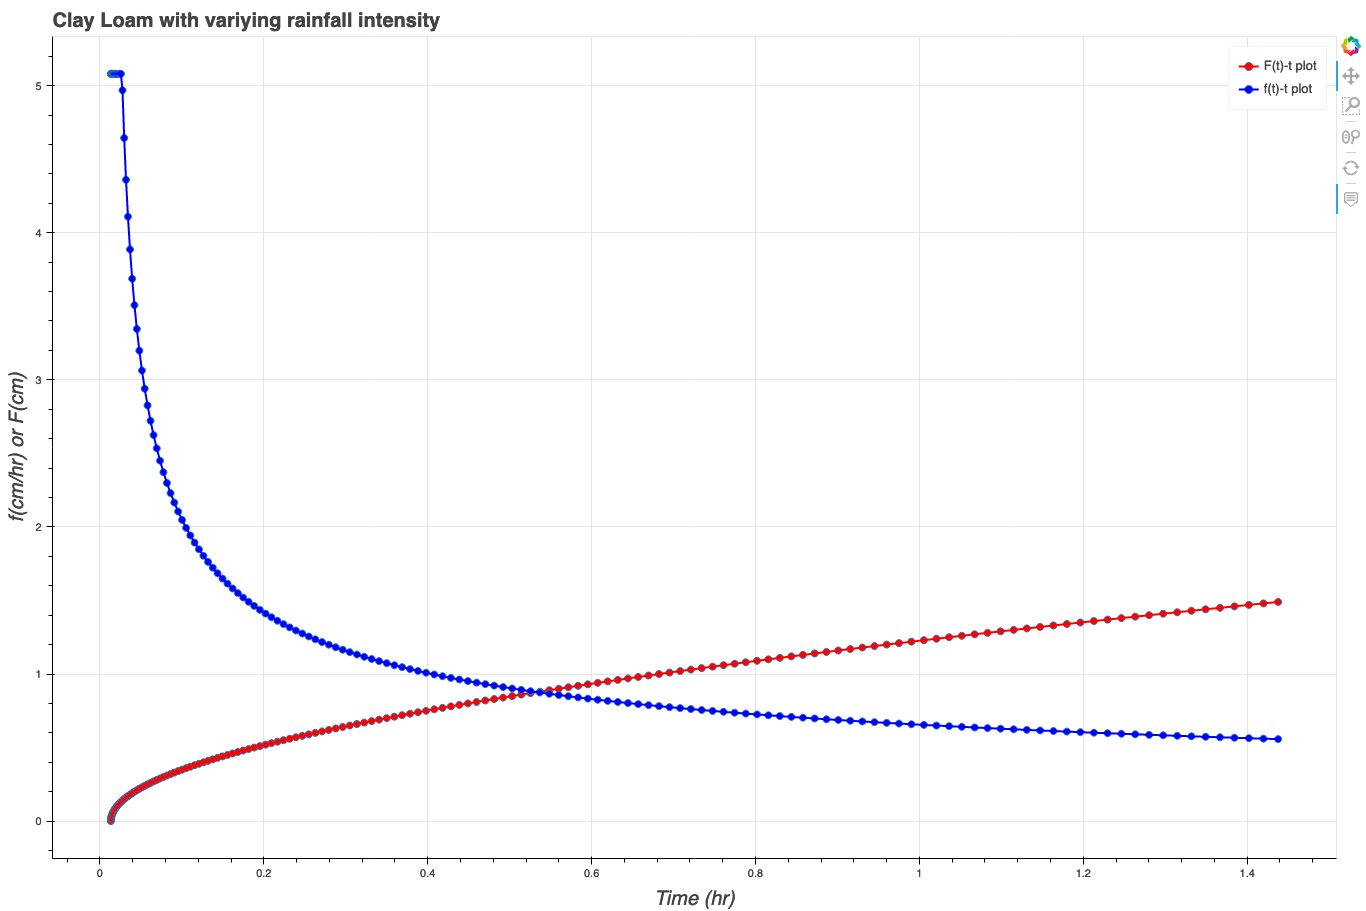

In [35]:
# f(t) vs t
fig = initialize_fig(title = 'Clay Loam with variying rainfall intensity',
                     x_axis_label = 'Time (hr)',
                     y_axis_label = 'f(cm/hr) or F(cm)',
#                      tooltips = [
#                          ('time (hr)', '$x'),
#                          ('f(cm/hr)',  '$y'),
#                      ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df_ga_clay_loam_2.t, df_ga_clay_loam_2.index, fill_color='red', size=7, legend_label='F(t)-t plot')
fig.line(df_ga_clay_loam_2.t, df_ga_clay_loam_2.index, line_width=2, line_color='red', legend_label='F(t)-t plot')

fig.circle(df_ga_clay_loam_2.t, df_ga_clay_loam_2.f_t, fill_color='blue', size=7, legend_label='f(t)-t plot')
fig.line(df_ga_clay_loam_2.t, df_ga_clay_loam_2.f_t, line_width=2, line_color='blue', legend_label='f(t)-t plot')


fig.legend.location = 'top_right'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_4_2.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_4_2.png')


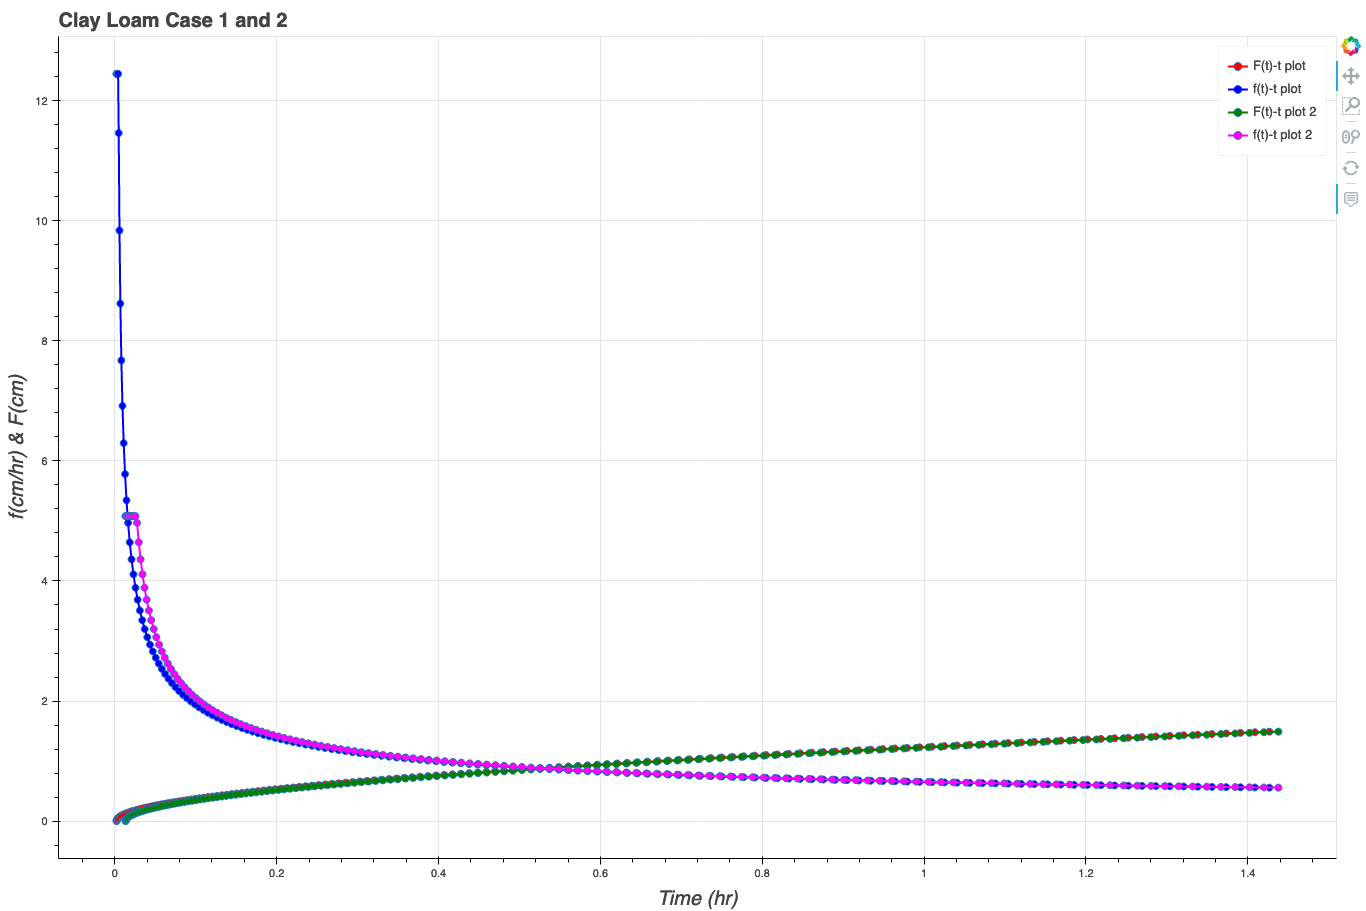

In [36]:
# With both together

# f(t) vs t
fig = initialize_fig(title = 'Clay Loam Case 1 and 2',
                     x_axis_label = 'Time (hr)',
                     y_axis_label = 'f(cm/hr) & F(cm)',
#                      tooltips = [
#                          ('time (hr)', '$x'),
#                          ('f(cm/hr)',  '$y'),
#                      ],
                     plot_height = 300,
                    )

fig.title.text_font_size = '15pt'
fig.xaxis.axis_label_text_font_size = '15pt'
fig.yaxis.axis_label_text_font_size = '15pt'

fig.circle(df_ga_clay_loam.t, df_ga_clay_loam.index, fill_color='red', size=7, legend_label='F(t)-t plot')
fig.line(df_ga_clay_loam.t, df_ga_clay_loam.index, line_width=2, line_color='red', legend_label='F(t)-t plot')

fig.circle(df_ga_clay_loam.t, df_ga_clay_loam.f_t, fill_color='blue', size=7, legend_label='f(t)-t plot')
fig.line(df_ga_clay_loam.t, df_ga_clay_loam.f_t, line_width=2, line_color='blue', legend_label='f(t)-t plot')

fig.circle(df_ga_clay_loam_2.t, df_ga_clay_loam_2.index, fill_color='green', size=7, legend_label='F(t)-t plot 2')
fig.line(df_ga_clay_loam_2.t, df_ga_clay_loam_2.index, line_width=2, line_color='green', legend_label='F(t)-t plot 2')

fig.circle(df_ga_clay_loam_2.t, df_ga_clay_loam_2.f_t, fill_color='fuchsia', size=7, legend_label='f(t)-t plot 2')
fig.line(df_ga_clay_loam_2.t, df_ga_clay_loam_2.f_t, line_width=2, line_color='fuchsia', legend_label='f(t)-t plot 2')

fig.legend.location = 'top_right'
fig.legend.click_policy='hide'
bp.show(fig)

export_png(fig, filename=f'{BASE_DIR}/problem_4_3.png', height=200, width=300)
Image(f'{BASE_DIR}/problem_4_3.png')


As can be seen, the time of ponding increases when the rainfall intensity decreased. As a result, the mass at ponding also increased. As a result, the initial infiltration rate until ponding which is the rainfall intensity is greater for first case.

If we replace the soil with the sandy loam soil compared to the clay loam, then since the porosity of the sandy loam is smaller than the clay loam, the tension or the pressure head increases. As a result, the sandy loam asymptote at higher infiltration rate than the clay loam. Similarly, the tension for the sandy loam is greater than the clay loam. 

#### Question 5
5.	Two rivers located 1000m apart from a fully penetrating an aquifer (not confined). The aquifer has a K value of  0. 5m/d. The region receives an average rainfall of 15 cm/yr and evapotranspiration loss is about 10 cm/yr. Assume that the water elevation in River 1 is 20m and the water elevation in River 2 is 18m.
<br>
a.	Use the Dupuit equation with recharge, and determine the the location and height of the water divide.
<br>
b.	What is the daily discharge per unit width into River 1 River 2?

In [ ]:
from sympy import symbols, Eq, solve

L = 1000 # length in meter
K = 0.5 # m/d hydraulic conductivity
P = 15. * (1 / 100) * (1 / 365.) # m/d
ET = 10. * (1 / 100.) * (1 / 365.) # m/d
W = P - ET # m/d
h0 = 20 # meter
hL = 18 # meter

q = 0 # for divide

# using dupuit eqn
location = symbols('location')
dupuit_eq = Eq( (K / (2 * L) * (h0**2 - hL**2)) + (W * (location - (L / 2))), q)
result = solve((dupuit_eq,), (location))
location, = result.values()
print(f'The water divide is {round(location, 3)} m from River 1')

depth = (h0**2 - ((location / L) * (h0**2 - hL**2)) + (W / K * (L - location)))**(1/2)
print(f'The water divide has a depth of {round(depth, 3)} m')


# discharge in River 1
q1 = (K / (2 * L) * (h0**2 - hL**2)) + W * (0 - (L / 2))
print(f'discharge in river 1: {round(q1, 3)} m/d')

q2 = (K / (2 * L) * (h0**2 - hL**2)) + W * (L - (L / 2))
print(f'discharge in river 2: {round(q2, 3)} m/d')
